<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Fuzzy_System/vacum_cleaner_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Antecedents (inputs)**

Surface: what is the difficult level of the surface? (0-5)
- easy, moderate, hard

Dirt: how much dirt? (0-5)
- light, moderate, heavy

**Consequent (output)**

Suction: what suction level should the vacuum cleaner bet set to? (0-10)
- low, medium, high

Rules
- If surface is *easy* and dirt is *light* then suction will be *low*
- If surface is *moderate* and dirt is *light* then suction will be *medium*
- If surface is *hard* or dirt is *heavy* then suction will be *high*

# Installing and importing the libraries

- Documentation: https://pythonhosted.org/scikit-fuzzy/overview.html

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=b70b33bb7cb1ca57fb33ab31d59fc2be6a2ca22deb00a2696e733722eceaf88b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedents and consequent

In [3]:
np.arange(0, 6, 1)

array([0, 1, 2, 3, 4, 5])

In [4]:
surface = ctrl.Antecedent(np.arange(0, 6, 1), 'surface')
dirt = ctrl.Antecedent(np.arange(0, 6, 1), 'dirt')

In [5]:
surface.universe, dirt.universe

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [6]:
suction = ctrl.Consequent(np.arange(0, 11, 1), 'suction')

In [7]:
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Membership functions

In [8]:
surface.automf(number = 3, names = ['easy', 'moderate', 'hard'])
dirt.automf(number = 3, names = ['light', 'moderate', 'heavy'])

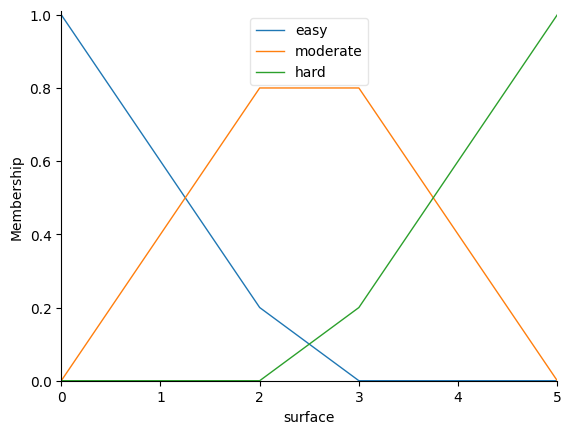

In [9]:
surface.view()

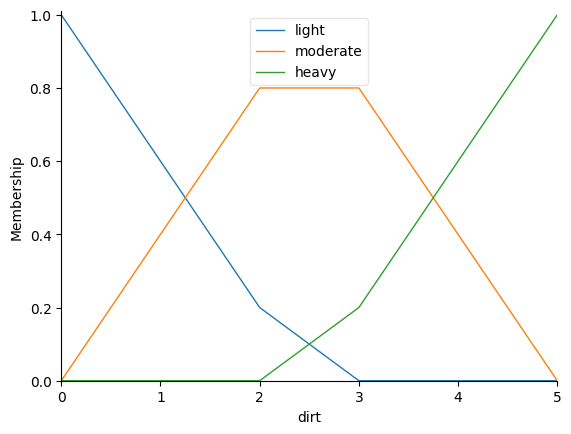

In [10]:
dirt.view()

In [11]:
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

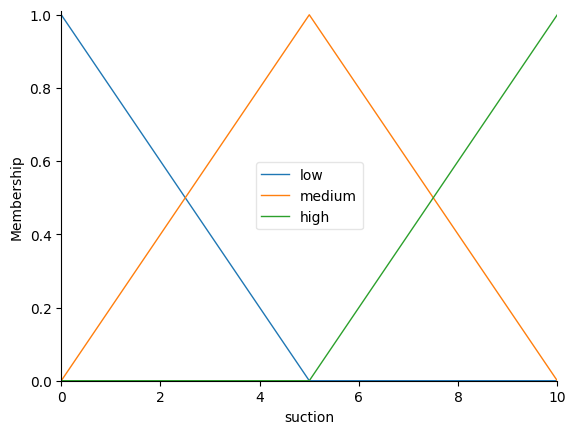

In [12]:
suction['low'] = fuzz.trimf(suction.universe, [0, 0, 5])
suction['medium'] = fuzz.trimf(suction.universe, [0, 5, 10])
suction['high'] = fuzz.trimf(suction.universe, [5, 10, 10])
suction.view()

In [13]:
rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])

## Control system

In [14]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

8.333333333333334


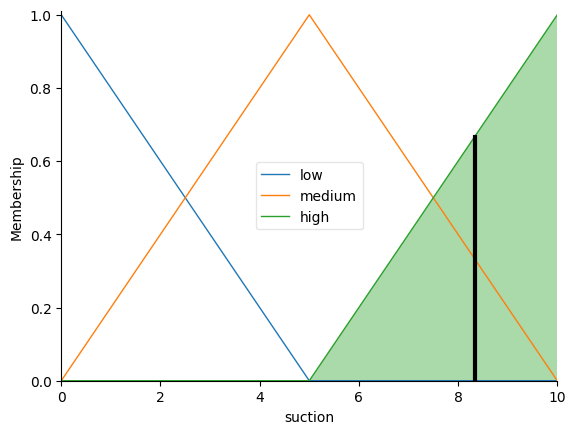

In [15]:
fuzzy_system.input['surface'] = 5
fuzzy_system.input['dirt'] = 5
fuzzy_system.compute()
print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

# Other functions

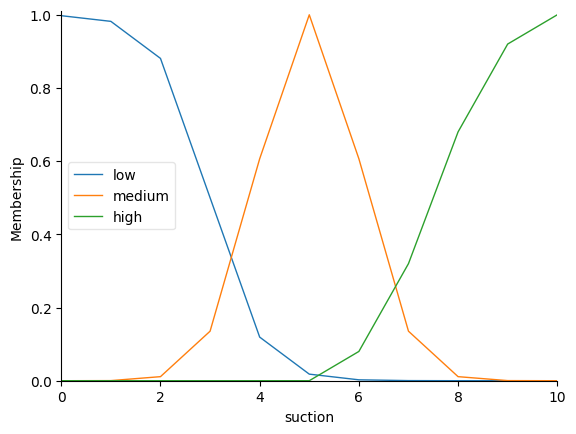

In [16]:
suction['low'] = fuzz.sigmf(suction.universe, 3, -2)
suction['medium'] = fuzz.gaussmf(suction.universe, 5, 1)
suction['high'] = fuzz.pimf(suction.universe, 5, 10, 10, 11)
suction.view()

In [17]:
rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

8.433621933621936


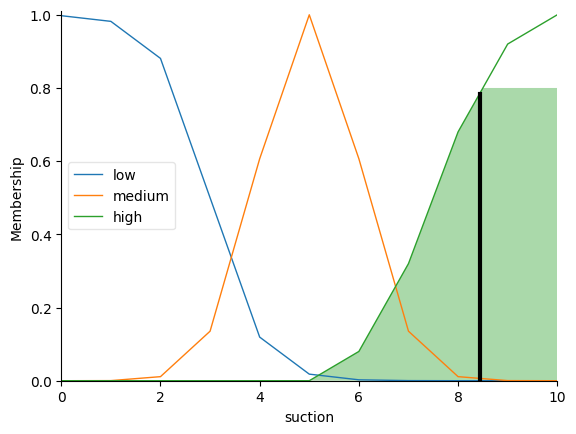

In [18]:
fuzzy_system.input['surface'] = 3.5
fuzzy_system.input['dirt'] = 4.5
fuzzy_system.compute()
print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)